In [1]:
from rdkit import Chem
from rdkit.Chem import Draw
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import warnings
warnings.filterwarnings('ignore')

In [2]:
zinc = pd.read_csv('./data/ZINC_logP_MR.csv')
zinc = zinc[zinc['Length'] <= 16].reset_index(drop=True)

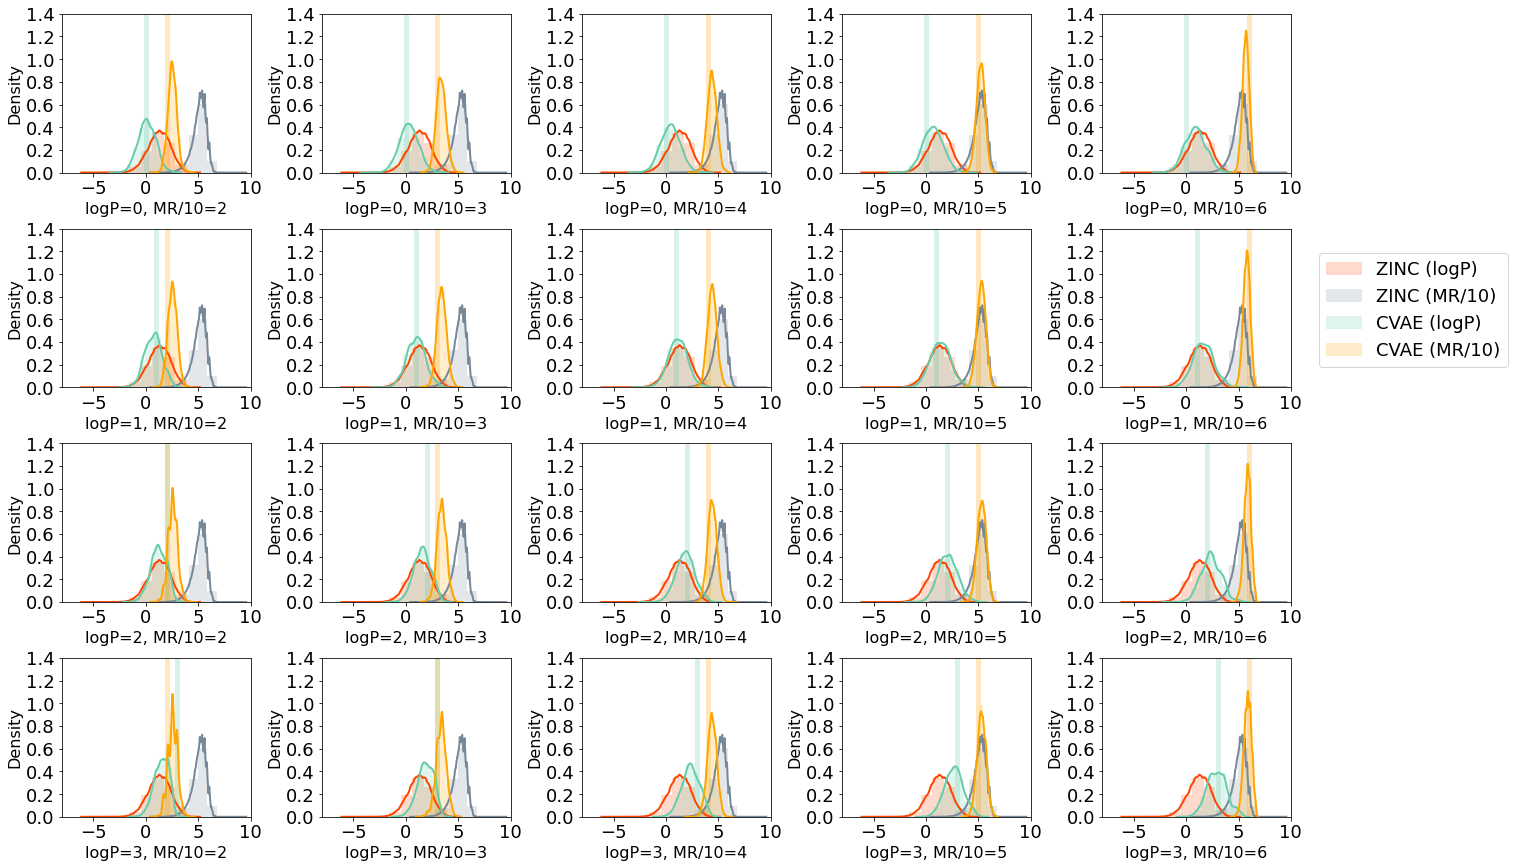

In [3]:
labels = 16
ticks = 18
legends = 18
figs = 3
xl = [-8, 10]
yl = [0, 1.4]
alp = 0.2
lw = 2
lalp = 0.25
clw = 5
b = 10
plt.figure(figsize=(figs*7, figs*4))
kwargs = dict(hist_kws={'alpha':alp}, kde_kws={'linewidth':lw})

n = 1
for i in [0, 1, 2, 3]:
    for j in [2, 3, 4, 5, 6]:
        plt.subplot(4, 5, n)
        cvae = pd.read_csv(f'./results/generated_{i}_{j}.csv')
        plt.plot([i, i], [0, yl[1]], color="mediumaquamarine", alpha=lalp, linewidth=clw)
        plt.plot([j, j], [0, yl[1]], color="orange", alpha=lalp, linewidth=clw)
        sns.distplot(zinc['logP'], color="orangered", label="ZINC (logP)", bins=b, **kwargs)
        sns.distplot(zinc['MR']/10, color="lightslategrey", label="ZINC (MR/10)", bins=b, **kwargs)
        sns.distplot(cvae['C1'], color="mediumaquamarine", label="CVAE (logP)", bins=b, **kwargs)
        sns.distplot(cvae['C2']/10, color="orange", label="CVAE (MR/10)", bins=b, **kwargs)
        plt.xlim(xl)
        plt.xlabel(f'logP={i}, MR/10={j}', fontsize=labels)
        plt.xticks(fontsize=ticks)
        plt.ylim(yl)
        plt.ylabel('Density', fontsize=labels)
        plt.yticks(np.arange(yl[0], yl[1]+0.2, 0.2), fontsize=ticks)
        n += 1
        if n == 11:
            plt.legend(loc='upper left', fontsize=legends, bbox_to_anchor=(1.1, 0.9))
plt.tight_layout(pad=0.5)
plt.show()

In [4]:
def cvae_scores(cvae, cond_1, cond_2):
    cvae1 = cvae[(cvae['C1'] < cond_1+0.5) & (cvae['C1'] > cond_1-0.5)].reset_index(drop=True)
    cvae2 = cvae[(cvae['C2'] < cond_2*10+5) & (cvae['C2'] > cond_2*10-5)].reset_index(drop=True)
    cvae3 = cvae1[(cvae1['C2'] < cond_2*10+5) & (cvae1['C2'] > cond_2*10-5)].reset_index(drop=True)
    return round(cvae1.shape[0]/cvae.shape[0]*100, 3), round(cvae2.shape[0]/cvae.shape[0]*100, 3), round(cvae3.shape[0]/cvae.shape[0]*100, 3), cond_1, cond_2*10

In [5]:
cvae02 = pd.read_csv('./results/generated_0_2.csv')
cvae12 = pd.read_csv('./results/generated_1_2.csv')
cvae22 = pd.read_csv('./results/generated_2_2.csv')
cvae32 = pd.read_csv('./results/generated_3_2.csv')
cvae03 = pd.read_csv('./results/generated_0_3.csv')
cvae13 = pd.read_csv('./results/generated_1_3.csv')
cvae23 = pd.read_csv('./results/generated_2_3.csv')
cvae33 = pd.read_csv('./results/generated_3_3.csv')
cvae04 = pd.read_csv('./results/generated_0_4.csv')
cvae14 = pd.read_csv('./results/generated_1_4.csv')
cvae24 = pd.read_csv('./results/generated_2_4.csv')
cvae34 = pd.read_csv('./results/generated_3_4.csv')
cvae05 = pd.read_csv('./results/generated_0_5.csv')
cvae15 = pd.read_csv('./results/generated_1_5.csv')
cvae25 = pd.read_csv('./results/generated_2_5.csv')
cvae35 = pd.read_csv('./results/generated_3_5.csv')
cvae06 = pd.read_csv('./results/generated_0_6.csv')
cvae16 = pd.read_csv('./results/generated_1_6.csv')
cvae26 = pd.read_csv('./results/generated_2_6.csv')
cvae36 = pd.read_csv('./results/generated_3_6.csv')

In [6]:
df = pd.DataFrame([cvae_scores(cvae02, 0, 2), 
                   cvae_scores(cvae12, 1, 2), 
                   cvae_scores(cvae22, 2, 2), 
                   cvae_scores(cvae32, 3, 2), 
                   cvae_scores(cvae03, 0, 3), 
                   cvae_scores(cvae13, 1, 3), 
                   cvae_scores(cvae23, 2, 3), 
                   cvae_scores(cvae33, 3, 3), 
                   cvae_scores(cvae04, 0, 4), 
                   cvae_scores(cvae14, 1, 4), 
                   cvae_scores(cvae24, 2, 4), 
                   cvae_scores(cvae34, 3, 4), 
                   cvae_scores(cvae05, 0, 5), 
                   cvae_scores(cvae15, 1, 5), 
                   cvae_scores(cvae25, 2, 5), 
                   cvae_scores(cvae35, 3, 5), 
                   cvae_scores(cvae06, 0, 6), 
                   cvae_scores(cvae16, 1, 6), 
                   cvae_scores(cvae26, 2, 6), 
                   cvae_scores(cvae36, 3, 6), ], 
                  columns=['Opt_logP (%)', 'Opt_MR (%)', 'Opt_Both (%)', 'C1_logP', 'C2_MR'])
df

,Opt_logP (%),Opt_MR (%),Opt_Both (%),C1_logP,C2_MR
0,44.122,47.228,21.726,0,20
1,43.376,45.316,18.734,1,20
2,34.137,39.929,8.733,2,20
3,5.136,38.570,0.000,3,20
4,40.659,59.603,25.889,0,30
5,41.592,57.071,24.190,1,30
6,40.049,56.985,20.124,2,30
7,23.460,60.017,11.578,3,30
8,36.394,58.250,22.837,0,40
9,41.261,56.815,25.849,1,40


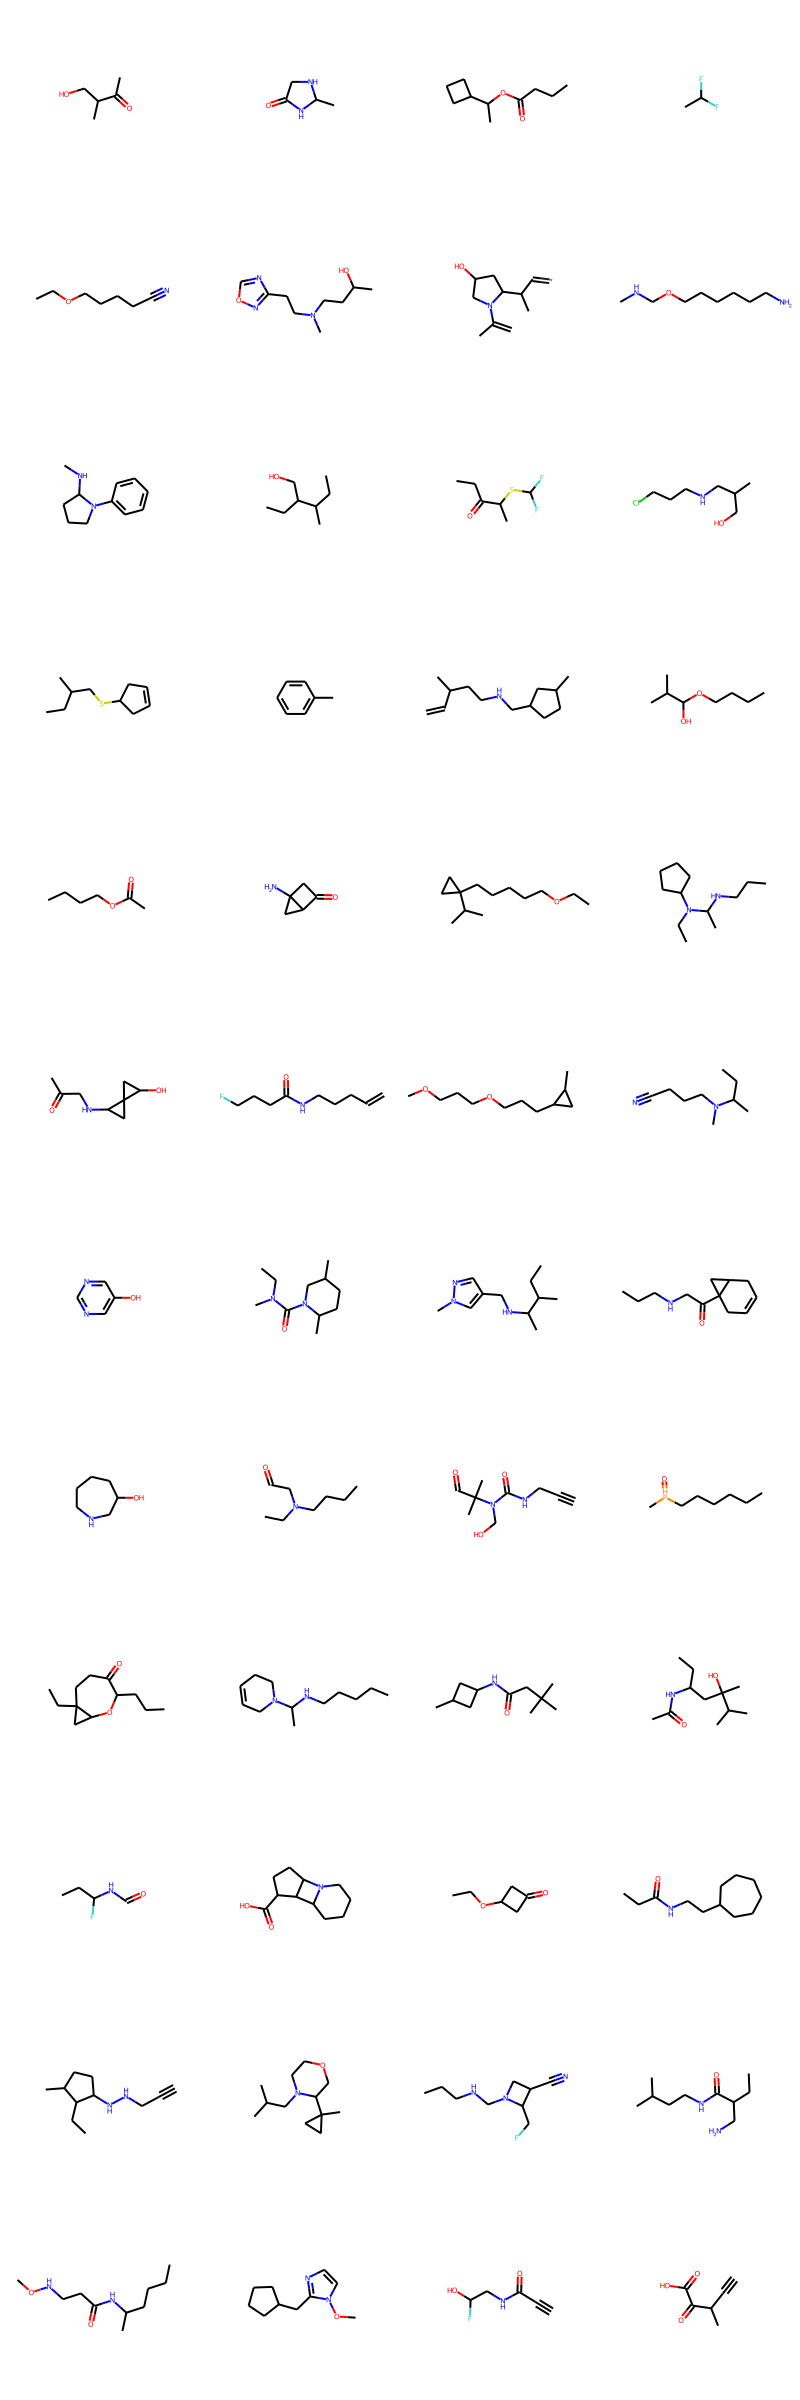

In [13]:
cvae = pd.concat([cvae02, cvae12, cvae22, cvae32, 
                  cvae03, cvae13, cvae23, cvae33, 
                  cvae04, cvae14, cvae24, cvae34, 
                  cvae05, cvae15, cvae25, cvae35, 
                  cvae06, cvae16, cvae26, cvae36])
cvae = cvae.drop_duplicates(['SMILES']).reset_index(drop=True)
samp = cvae.sample(n=48).reset_index(drop=True)
display(Draw.MolsToGridImage([Chem.MolFromSmiles(s) for s in samp['SMILES']], molsPerRow=4))